In [29]:
%run functions.py

import numpy as np
import pandas as pd
from scipy.io import loadmat

from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor


# Task 3 - Regression 

## Load settings

In [30]:
pd.set_option('display.max_colwidth',-1)
import sys
np.set_printoptions(threshold=sys.maxsize)

k=10 # Define k for crossvalidation
seed = 42 # Seed to use
feature_tot = 0 # Total selected features -> Start at 0 before PCA

scoring='neg_mean_squared_error' # Scoring method for GridsearchCV
score_function = f_regression # Score function for Feature selection


np.random.seed(seed) # Define the random seed

In [31]:
# GridSearchCV
estimators = [
    ('clf', 'passthrough'),
]
param_grid = [
    {
        'clf':[SVR()],
        'clf__C':[0.1,10,100],
    },{
        'clf':[Lasso(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,1000,5000,10000],

    },{
        'clf':[ElasticNet(random_state=seed)],
        'clf__alpha':[0.1,1.0,2.0,5.0],
        'clf__max_iter':[100,1000,5000,10000],
    },{
        'clf':[MLPRegressor()],
        'clf__hidden_layer_sizes':[(100,),(50,50,50)],
        'clf__activation':['relu'],
        'clf__solver':['adam'],
        'clf__alpha':[0.0001,0.001,0.1],
        'clf__max_iter':[200,100,50,2000],
        'clf__early_stopping':[True, False]
    }
]

## Load dataset

In [32]:
filename = "datasets/powerTrainData.mat"

mat = loadmat(filename)
input_train = mat['powerTrainInput'].T

target_train = mat['powerTrainOutput'].reshape(len(input_train))
input_test = mat['powerTestInput'].T

## Data info

In [33]:
get_data_info(input_train, target_train)

Length of 844
X.shape: (844, 15) y.shape: (844,)
Contains Nan: False False
Contains +inf: False False
Contains -inf: False False
Input: [[ 3.2400e+03  2.5467e+03  2.4383e+03  3.2400e+03  3.2400e+03  4.5000e+01
   3.7000e+01  4.4040e+01  4.6760e+01  2.6480e+01  1.0780e+01  3.9170e+01
   8.1400e+00  9.8200e-01  1.8800e-01]
 [ 1.8710e+03  1.7938e+03  1.7097e+03  2.0940e+03  2.0940e+03  6.1000e+01
   5.7000e+01  6.6670e+01  6.5480e+01  5.2670e+01  4.8920e+01  7.0000e+01
   7.2260e+01 -9.1200e-01 -4.0900e-01]] 
Target: [3359 1868]


## Preprocess
Normalize the dataset

In [34]:
input_train, input_test, target_train, input_train_copy, input_train_copy_normalized = preprocessing(input_train,target_train, input_test)

844


## Feature reduction
Reduce dimensionality by PCA transform

In [35]:
feature_tot, pca, pca_input = feature_reduction(input_train, target_train,input_train_copy)

original shape:    (844, 15)
transformed shape: (844, 6)
Explained variance: [0.71291343 0.08305948 0.06661705 0.04012179 0.03533515 0.02463563]


# Plot PCA

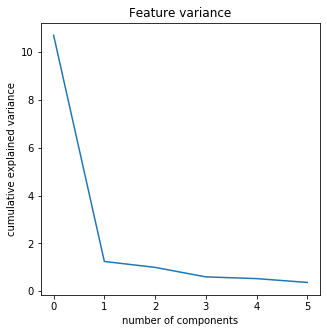

In [36]:
plot_feature_variance(pca_input)

## Plot top 10 histogram over reduced features

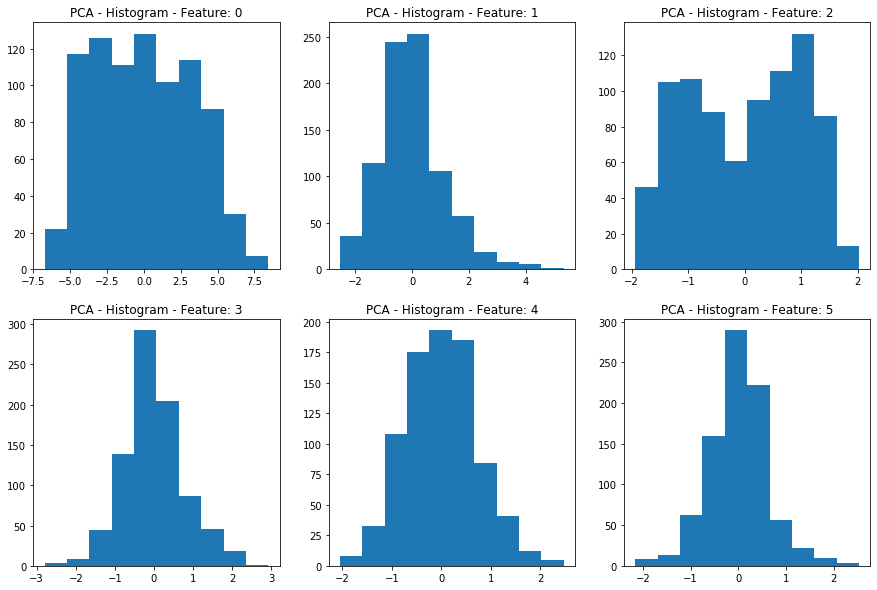

In [37]:
plot_top_features(feature_tot,pca_input)

# Feature selection
Extract top features above depending on PCA

(844, 15)


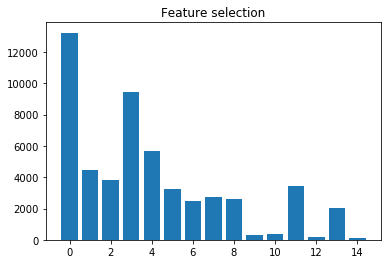

In [38]:
input_train_fs, input_test_fs = feature_selection(score_function, input_train, target_train, input_test, feature_tot=feature_tot)

## Hyperparameter tuning

In [39]:
# GridSearchCV
grid = parameter_tuning(estimators, param_grid, input_train_fs, target_train, scoring=scoring, k=k)


Fitting 10 folds for each of 83 candidates, totalling 830 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 830 out of 830 | elapsed: 43.8min finished


## Get Model info

In [40]:
get_model_info(grid)

Best score: -10928.476520492413
Best params {'clf': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False), 'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__early_stopping': False, 'clf__hidden_layer_sizes': (50, 50, 50), 'clf__max_iter': 2000, 'clf__solver': 'adam'}

                                                                                                                                                                                                                                                               

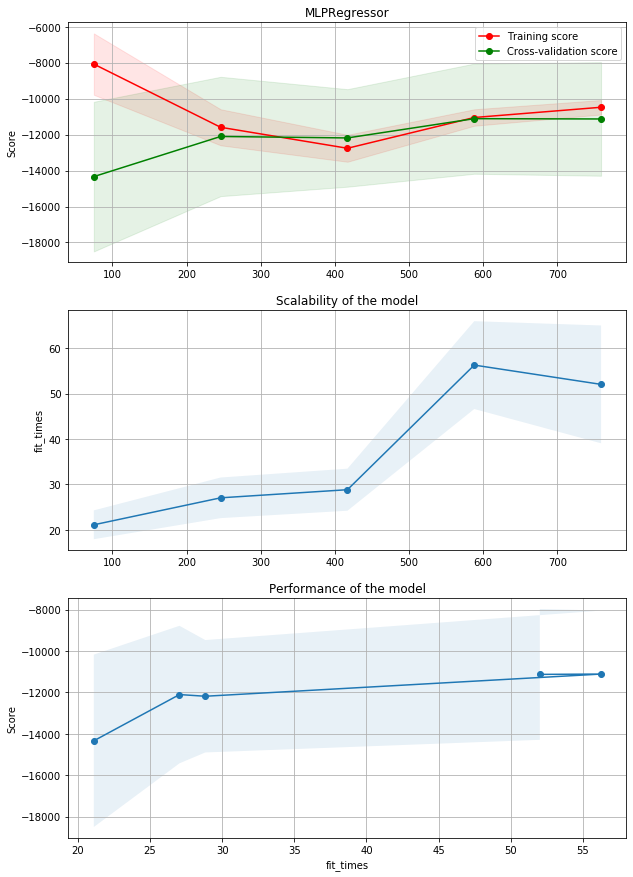

In [41]:
validate_curve(grid, input_train_fs, target_train,scoring=scoring, k=k)

# Predict testset

In [42]:
model = predict_model(grid, input_train_fs, target_train, input_test_fs)

[3275.74330653 3111.82122693 3303.19593433 3117.78807049 2862.17792245
 2515.18203303 2387.06691146 3375.75231361 3086.34479643 3407.04604416
 3239.27606911 3418.62680779 2982.70221616 2860.43849946 2395.59753183
 3198.28329866 3280.31936356 3194.01724711 2712.80014797 3272.58625038
 2914.60510998 3088.34283147 3212.25679678 3270.78486271 2961.99043943
 3117.01086747 3540.84468772 2299.94243173 3185.65346791 3293.0648924
 3668.62338901 2950.52948916 3095.46871678 3906.75779077 3446.80722308
 3213.96320061 3354.38444309 2823.57663453 3154.74865282 2881.15060431
 2665.83234783 3483.53582245 3054.4410759  3396.45315474 3593.6932775
 3065.59410321 2504.65451803 2805.39629201 2865.67731043 2297.16946418
 3157.93808867 3513.19843168 3093.84420703 2478.53078331 2961.72749109
 3171.64006788 2609.50709336 3278.74033948 3425.88269739 3169.47057244
 3171.28001038 3713.90641823 2918.67127811 3082.32397121 3750.14645249
 3448.34650113 3209.59001198 3131.75829926 2970.578744   3306.52953688
 2497.35